In [22]:
# Import Statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [23]:
# EA Games example - A/B Testing

# Was the 43% difference in more purchases with Control Group higher than Test Group - statistically significant?
# Just because we see the mean is different, does not mean it's statistically significant

# Import stack overflow csv data:
stack_overflow = pd.read_csv("/Users/christine/VSCode/MBAN 6110 - remote/schulich_MBAN6110/DC_Hypothesis_Testing/csv_files/stack_overflow.csv")


In [24]:
# Hypothesis around the mean

#print(stack_overflow)

# Hypothesis: Mean annual compensation is $110,000 for data scientists
# Point estimation, mean()

# Annual compensation is $100,000.

mean_comp_samp = stack_overflow["converted_comp"].mean()
mean_comp_samp



119574.71738168952

In [25]:
# Bootstrap distribution - take a bunch of random data to sample from the main rows

import numpy as np

so_boot_dist = []

for i in range (5000):
    so_boot_dist.append(
        np.mean(
            stack_overflow.sample(frac=1, replace = True)["converted_comp"]
        )
    )


# Got 5000 samples
len(so_boot_dist)



5000

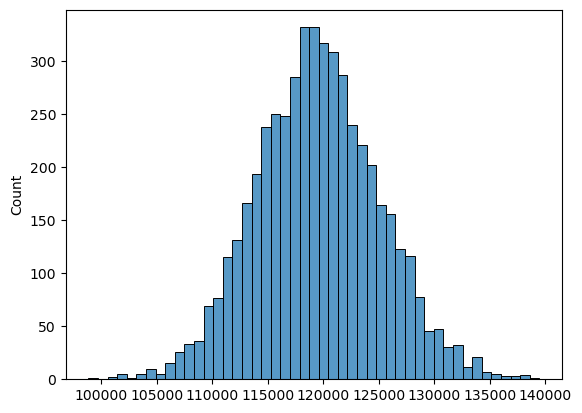

In [26]:
sns.histplot(so_boot_dist)
plt.show()

In [37]:
# Z-Scores for standardization

# z = value - mean / standard deviation

# Actual Mean
observed_mean = stack_overflow["converted_comp"].mean()

# Our Hypothesis that the mean is actually closer to 110,000
mean_comp_hyp = 110000

# Standard error for Pandas - Normalized: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sem.html
# std - https://numpy.org/doc/stable/reference/generated/numpy.std.html
std_error = stack_overflow["converted_comp"].sem()
print(std_error)


# Z-score formula = sample stat - hypothesized value / std.error  or (x - mu) / std., 
# X is your actual mean, and mu is your hypothesis.

# Hypothesis Testing
z_score = (observed_mean - mean_comp_hyp) / std_error
z_score

# Is 1.71 a big standard error?
# Use of hypothesis testing

# Determine if the sample statistic is close or far away from the expected average or mean
# You don't necessarily know if it's statistically significant!

# Normal distribution - Z distribution

119574.71738168952
5584.778543113675


1.7144309855393731

In [40]:
# Stack overflow survey:

stack_overflow["age_first_code_cut"].value_counts()

age_first_code_cut
adult    1376
child     885
Name: count, dtype: int64

In [48]:
# pass Z-Score to look and determine p-value
from scipy.stats import norm

prop_child_samp = (stack_overflow["age_first_code_cut"] == "child").mean()
prop_child_hyp = 0.35

std_error = 0.01035

zscore = (prop_child_samp - prop_child_hyp) / std_error

# left-tail, use norm.cdf, right tail is reverse
p_value = 1 - norm.cdf(zscore, loc = 0, scale = 1)

# Significantly smaller than 0.0.5
# Reject H0 in favor of alternate hypothesis. There is statistically significance evidence that people started programming as children, more than 35% 

3.141714835019904e-05